# Numpy

- 일반 list에 비해 빠르고 메모리 효율적
- 반복문 없이 데이터 배열에 대한 처리를 지원
- 선형대수 연산
- low level인 C, C++, 포트란 등과 통합가능. 

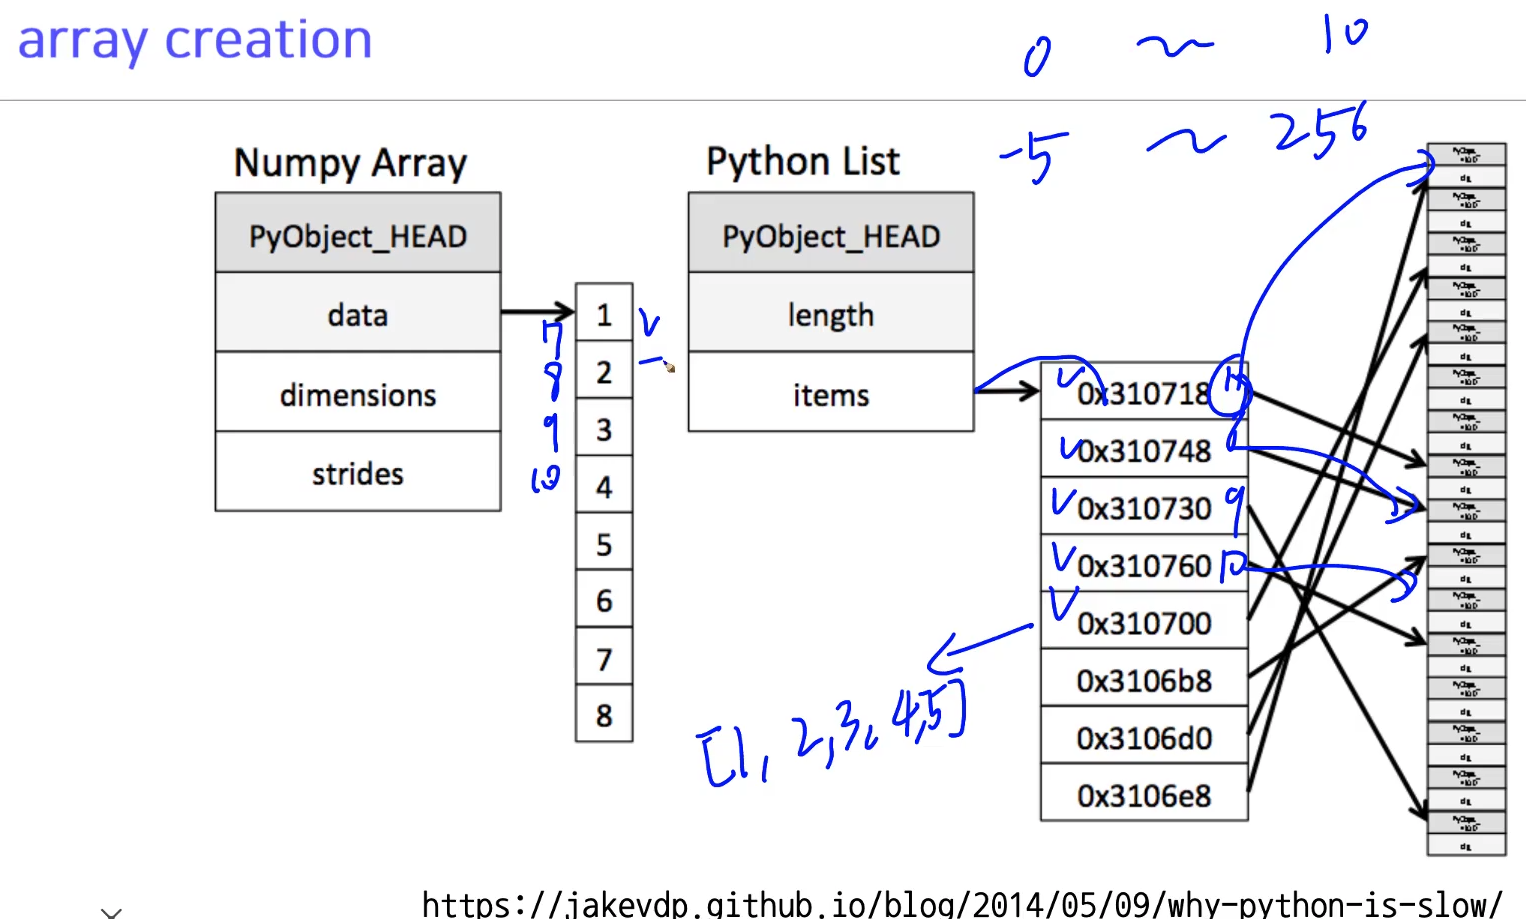

list는 주소값을 저장하하는 객체가 생기는 것이라 여러 객체를 넣기 좋지만 거쳐가야 하기 때문에 느리고 크다. 

numpy는 연속하여 저장되기 때문에 빠르고 작다. 

## `np.ndarray`

- 하나의 데이터 타입만 넣을 수 있다. Dynamic typing not supported. 

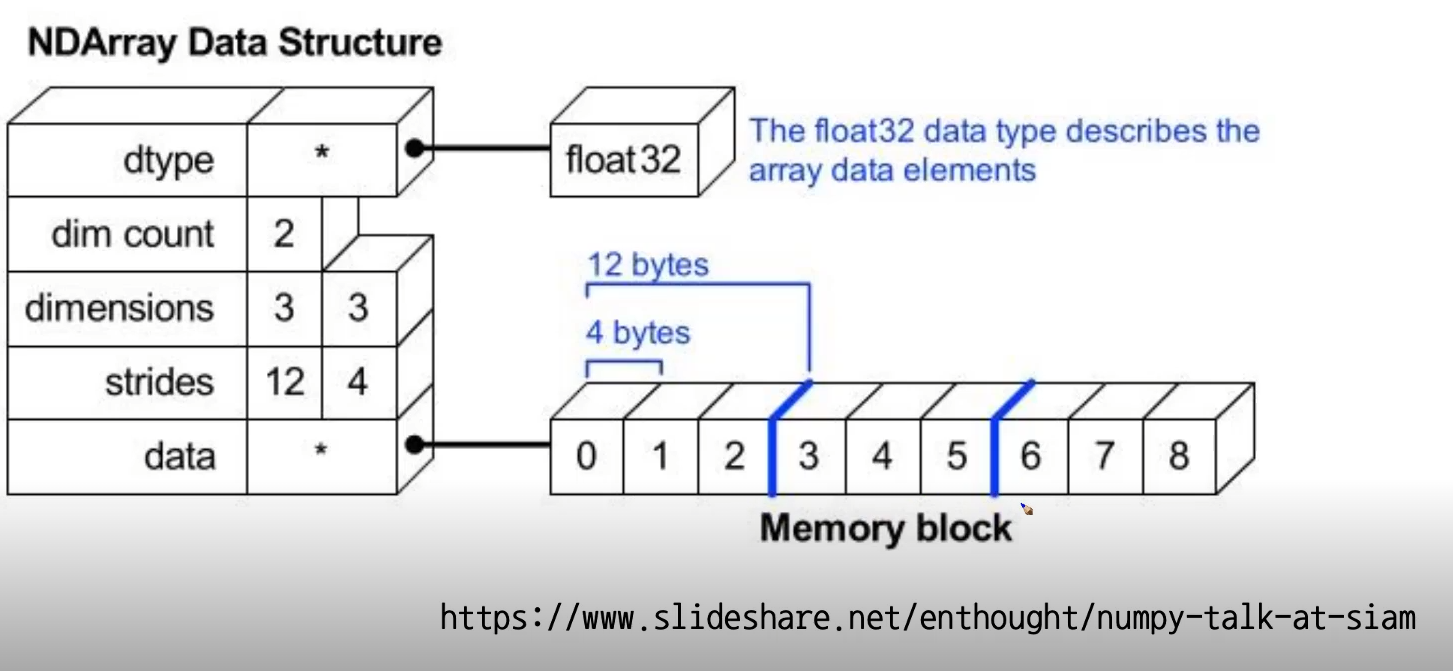

같은 type들이 들어가기 때문에 칸마다의 크기도 일정하다. 

In [1]:
import numpy as np

In [23]:
np.array(['1', '4.0', 6.0, 8], dtype=np.float32)

array([1., 4., 6., 8.], dtype=float32)

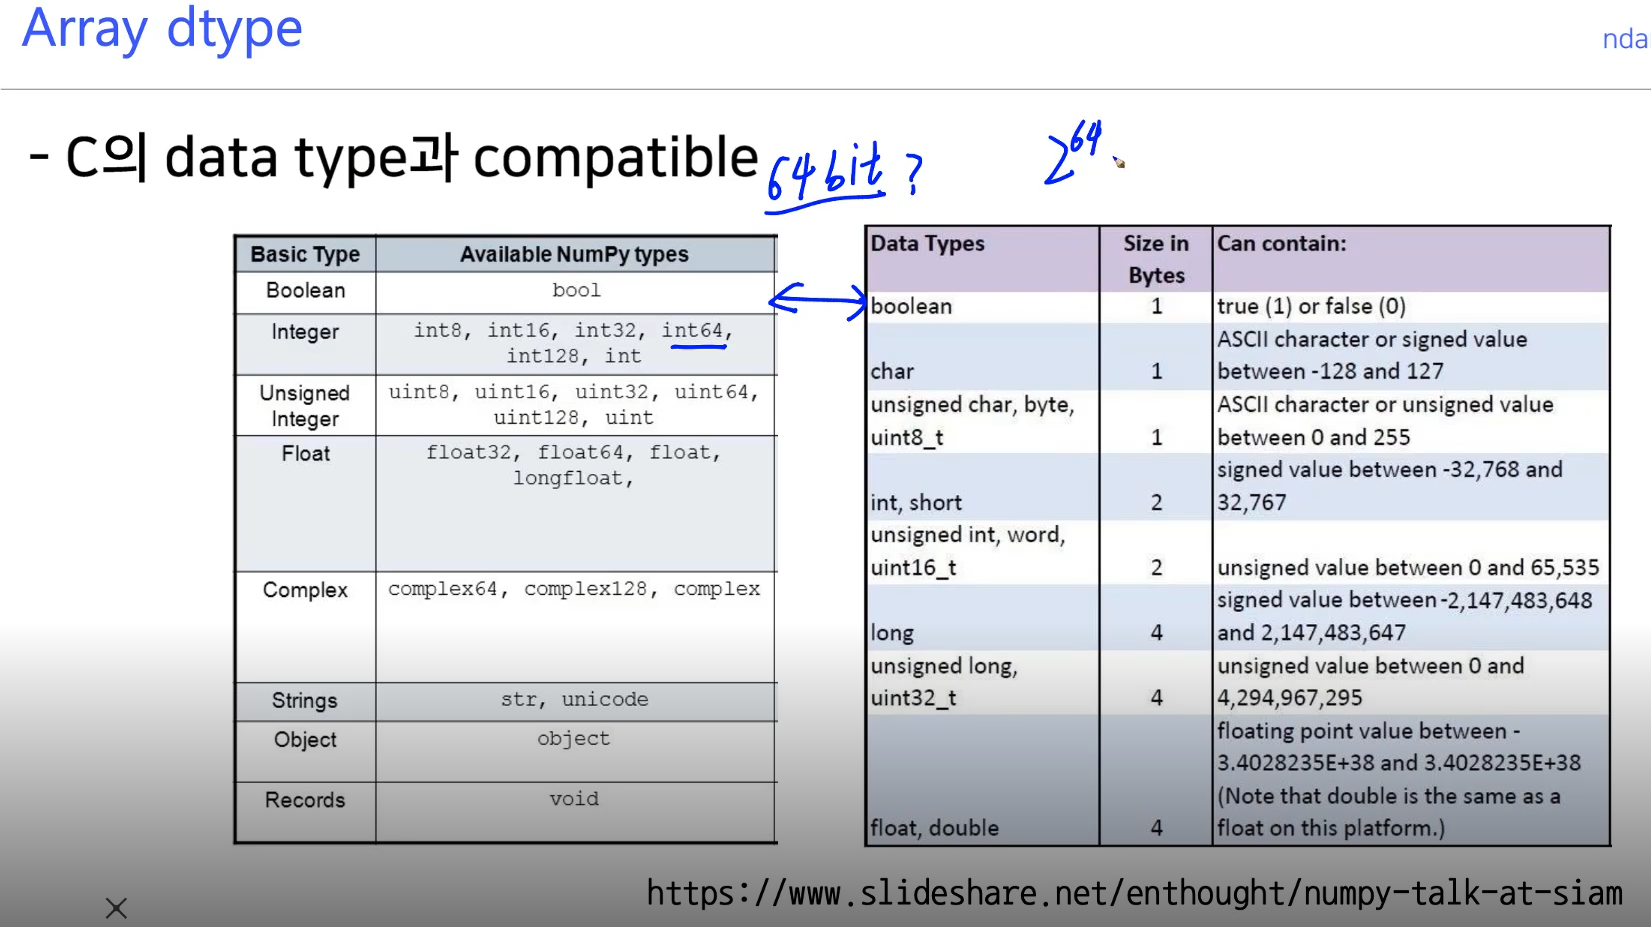

`np.float32` 와 같이 넘파이 타입으로 설정도 가능. 

이걸로 좀 더 효율적으로 짤 수 있다. 

In [27]:
np.array(['1', '4.0', 6.0, 8], dtype=np.float16).nbytes

8

In [28]:
np.array(['1', '4.0', 6.0, 8], dtype=np.float64).nbytes

32

In [4]:
a = [1, 2, 3, 4, 5]
b = [1, 2, 3, 4, 5]

a[0] is b[0] # 같은 객체를 참조

True

In [6]:
a = np.array(a)
b = np.array(b)

a[0] is b[0] # 아예 서로 다른 배열을 만들어 저장하기 때문에 같은 0번째 원소 1이 아니게 됨. 

False

- `shape`
- `dtype`

In [17]:
a = np.arange(24).reshape(4, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [18]:
a.shape

(4, 3, 2)

In [20]:
a.dtype

dtype('int32')

In [21]:
a.ndim

3

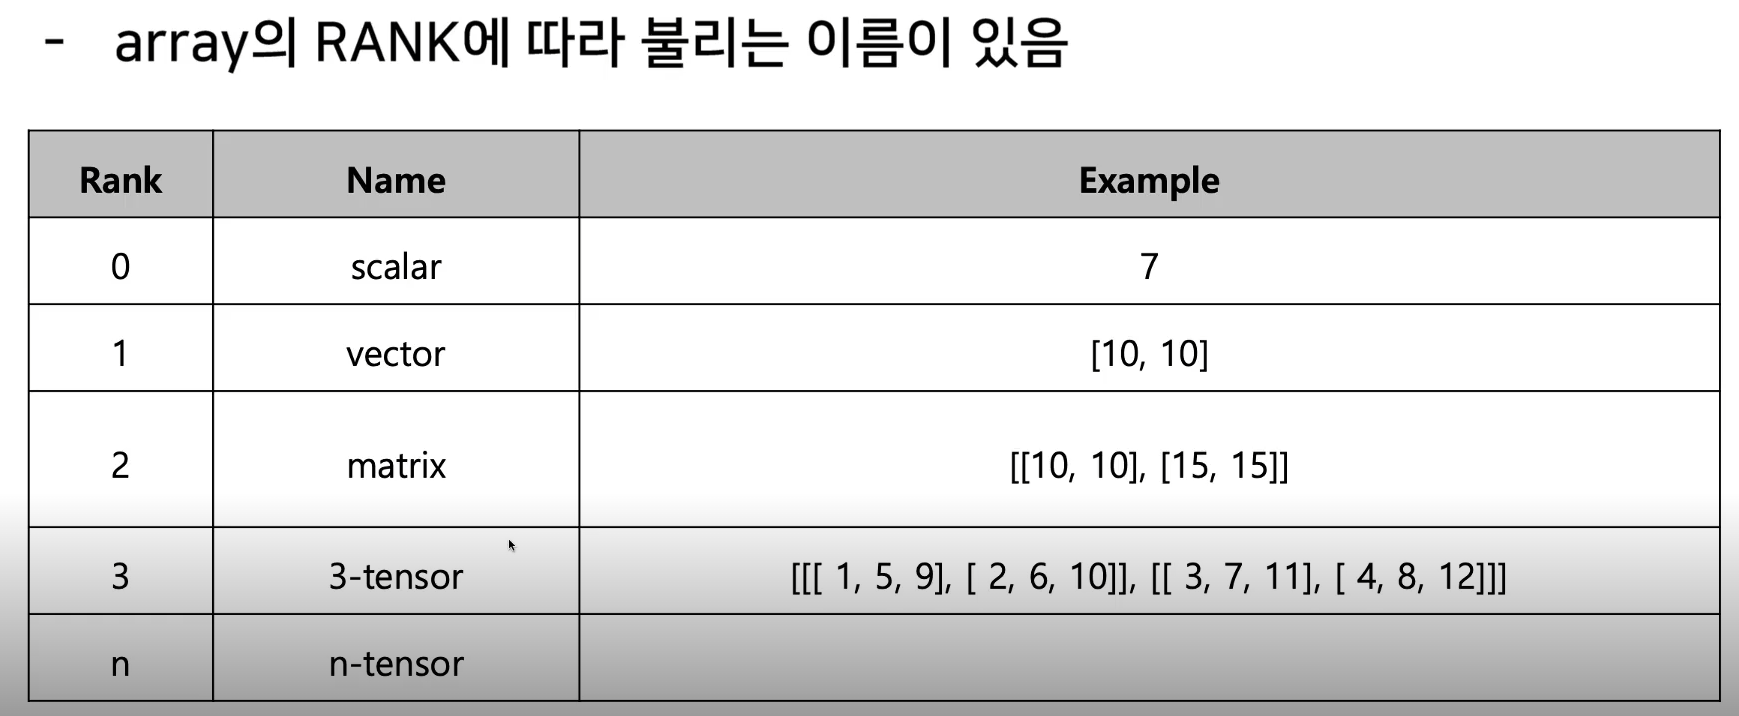



## Handling shape

다양한 method를 살펴본다. 

In [70]:
a = np.arange(24).reshape(4, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [71]:
a = a.reshape(-1, 2, 4) # -1을 넣어주면 다른 값을 바탕으로 자동으로 size를 맞춘다. 
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [72]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [73]:
a.flat

In [74]:
for i in a.flat:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [75]:
a[2, 1]

array([20, 21, 22, 23])

In [76]:
a[2][1]

array([20, 21, 22, 23])

In [77]:
a[None, 1] # None은 새로운 축을 의미

array([[[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [78]:
a[None, None, 1]

array([[[[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]])

In [79]:
a[1, None, None]

array([[[[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]])

In [83]:
a[1, :, 1] # :는 모두선택을 의미, 중간 값 꺼낼 때 유용

array([ 9, 13])

In [84]:
a[:, ::2] # step을 이용해 slicing할 수도 있다. 

array([[[ 0,  1,  2,  3]],

       [[ 8,  9, 10, 11]],

       [[16, 17, 18, 19]]])

## creation function

In [85]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [86]:
np.arange(0, 5, 0.5) # float도 step으로 사용 가능

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [88]:
np.zeros(shape=(10, ), dtype=np.int8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [89]:
np.ones(shape=(2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [90]:
np.empty(shape=(4, 3))

array([[1.11886058e-311, 3.16202013e-322, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.24678579e-057],
       [8.38635761e+165, 3.88639022e-057, 8.97772213e-067],
       [2.88177589e+180, 1.00500710e-070, 7.60960455e-042]])

`np.empty()`의 경우는 shape만 주어지고 비어있는 ndarray를 생성한다. 

memory initialization이 되지 않는다. 그래서 이상한 값들이 그대로 반환된다. (다른 프로그램들이 메모리에 넣어놨던 값들)

In [91]:
np.zeros_like(a) # shape만 복사 

array([[[0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0]]])

In [92]:
np.identity(n=3) 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [97]:
np.eye(N=3, M=5, k=2) # (N, M) shape의 행렬에서 몇 번째 column부터 identity 행렬을 시작하느냐를 k로 지정

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [102]:
foo = np.arange(12).reshape(3, 4)
foo

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [104]:
np.diag(foo) # 행렬의 대각원소들을 반환. 1d, 2d에서만 지원됨. 

array([ 0,  5, 10])

In [105]:
np.diag(foo, k=-1) # 대각선이 한 칸 뒤로 (왼쪽으로) 가서 반환해주는 것을 볼 수 있다. 

array([4, 9])

## random sampling

In [110]:
import matplotlib.pyplot as plt

In [157]:
uniform_dist = np.random.uniform(low=0, high=1, size=10000) # uniform distribution

<BarContainer object of 100 artists>

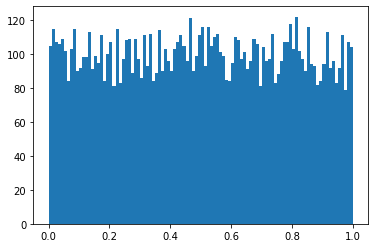

In [158]:
plt.hist(uniform_dist, bins=100)[2]

In [159]:
normal_dist = np.random.normal(0, 1, 10000)

<BarContainer object of 100 artists>

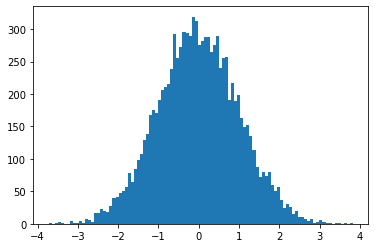

In [160]:
plt.hist(normal_dist, bins=100)[2]

In [161]:
exponential_dist = np.random.exponential(scale=2, size=10000)

<BarContainer object of 100 artists>

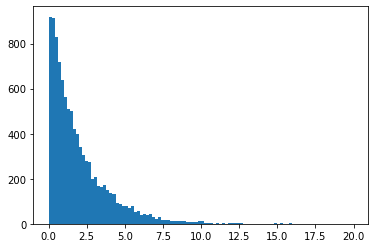

In [162]:
plt.hist(exponential_dist, bins=100)[2]

## operation functions

axis 개념을 잘 알아둬야 한다. operation으 기준이 되는 dimension 축이다. 

In [167]:
foo = np.arange(60).reshape(3, 4, 5)
foo

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [168]:
foo.sum(axis=0)

array([[ 60,  63,  66,  69,  72],
       [ 75,  78,  81,  84,  87],
       [ 90,  93,  96,  99, 102],
       [105, 108, 111, 114, 117]])

In [169]:
foo.sum(axis=1)

array([[ 30,  34,  38,  42,  46],
       [110, 114, 118, 122, 126],
       [190, 194, 198, 202, 206]])

In [170]:
foo.sum(axis=2)

array([[ 10,  35,  60,  85],
       [110, 135, 160, 185],
       [210, 235, 260, 285]])

## concatenation

- `vstack`
- `hstack`

In [174]:
a = np.arange(0, 3)
b = np.arange(3, 6)

np.vstack((a, b))

array([[0, 1, 2],
       [3, 4, 5]])

In [175]:
a = np.arange(0, 3).reshape(3, 1)
b = np.arange(3, 6).reshape(3, 1)

np.hstack((a, b))

array([[0, 3],
       [1, 4],
       [2, 5]])

In [266]:
# 축 추가
foo = np.array([5, 6])

foo[None, :]

array([[5, 6]])

In [267]:
foo[np.newaxis, :]

array([[5, 6]])

## numpy 연산

`*`: element-wise multiplication = hadamard product 성분곱

`dot` product: != `matmul`. tensor matrix에서 결과가 다르다. 

`T` 또는 `transpose()`: transpose

broadcasting: 
1. matching되는 dimension이 1이거나
2. 일치할 때 

broadcasting 가능. 

row vector과 column 벡터가 만났을 때는 서로 1차원인 부분을 broadcasting 해주며 m*n 행렬이 나옴. 

Numpy 연산이 list comprehension보다도 빠르다. 

## comparison 

`all`, `any`

comparison 시 element-wise 하게 비교하여 boolean array 반환. 

`logical_and`, `logical_not`, `logical_or` 은 `&`, `~`, `|` 로 대체 가능 (대신 괄호 주의해야) 

## `np.where()`

(조건, True일때의 값, False일때의 값)

만약 조건만 주어질 땐 `np.nonzero`와 동일. 결과에 대해 dimension별로 좌표를 tuple로 찍어준다. 

조건 부분에 `np.isnan(x)`, `np.isfinite(x)` 와 함께 사용가능. 

In [255]:
a = np.arange(60).reshape(4, 3, 5)
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44]],

       [[45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [256]:
min_thres = 10
max_thres = 33

In [257]:
(min_thres < a) & (a < max_thres)

array([[[False, False, False, False, False],
        [False, False, False, False, False],
        [False,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]]])

In [258]:
a[(min_thres < a) & (a < max_thres)] # boolean indexing

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32])

In [259]:
np.where((min_thres < a) & (a < max_thres), 1, np.nan)

array([[[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]]])

In [260]:
np.where((min_thres < a) & (a < max_thres)) # np.nonzero와 같다. 

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2],
       dtype=int64),
 array([2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0],
       dtype=int64),
 array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2],
       dtype=int64))

In [268]:
b = (min_thres < a) & (a < max_thres)
np.nonzero(b)

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2],
       dtype=int64),
 array([2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0],
       dtype=int64),
 array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2],
       dtype=int64))

In [261]:
len(np.where((min_thres < a) & (a < max_thres))[0])

22

## `np.argmax(x)`, `np.argmin(x)`

array 내 최대값 또는 최소값의 index를 반환함. 

`axis=`를 주면 각 dimension에 대해 해당 axis를 기준으로 min/max를 뽑은 index를 반환. 

In [269]:
a = np.array([2,4,6,3,8,9,0,5])
a

array([2, 4, 6, 3, 8, 9, 0, 5])

In [270]:
a.argsort()

array([6, 0, 3, 1, 7, 2, 4, 5], dtype=int64)

In [272]:
np.argmax(a)

5

In [273]:
np.argmin(a)

6

## boolean indiexing & fancy indexing

boolean indexing으로 뽑기 가능. 

fancy indexing은 int list를 쓴다. 

fancy indexing 시 위에서 본 것 처럼 각 axis를 list에 넣어서 한꺼번에 넣어줘도 된다. 

예를들어 

In [274]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [282]:
axis0 = np.where(a > 5)[0]
axis0

array([2, 2, 2], dtype=int64)

In [283]:
axis1 = np.where(a > 5)[1]
axis1

array([0, 1, 2], dtype=int64)

In [285]:
a[axis0, axis1]

array([6, 7, 8])

## Save & Load

txt로 저장할 수도 있고 

npy로 저장할 수도 있고

pickle로 저장할 수도 있고 

h5로 저장할 수도 있다. 

### txt

```python
np.loadtxt('foo.txt', delimiter='\t')

bar_m = np.arange(9)
np.savetxt('foo.csv', bar_m, delimiter=',')

```

### npy

numpy object를 pickle 형식으로 저장한다. 

```python
np.save('foo', arr=bar_m) 

```